# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [401]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [402]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


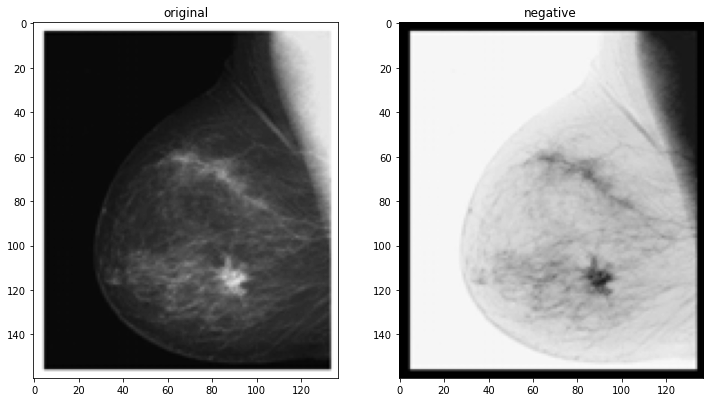

In [403]:
'''
1
Negative Transformation
'''
import skimage.color as imcol
def read_pic(path):
    original_img = io.imread(path) 
    return imcol.rgb2gray(original_img)
    
def Negative(image):
    img  = np.array(image)
    return 255 - img
# 1 
gray_scaled = read_pic('imgs/Picture1.png')
show_images([gray_scaled,Negative(gray_scaled)],['original','negative'])




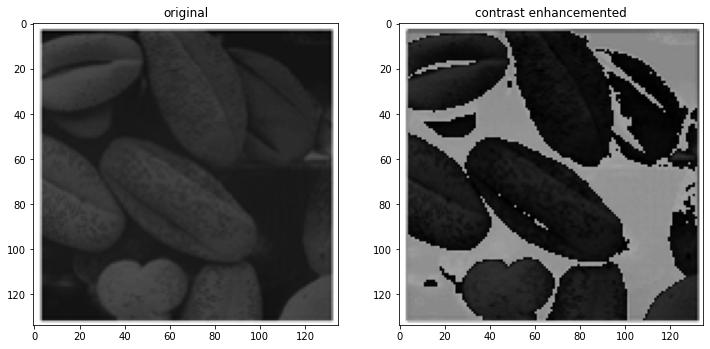

In [404]:
'''
2
Contrast Enhancement
'''


def con_enh(image): # contrast enhancement
    img  =  np.array(image) * 255 // 1 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < 101:
                img[i,j] = 50 + img[i,j] * 1.5  
    return img

gray_scaled =read_pic('imgs/Picture2.png')
show_images([gray_scaled,con_enh(gray_scaled)],['original','contrast enhancemented'])



In [405]:
'''
3
Gamma Correction
'''




'\n3\nGamma Correction\n'

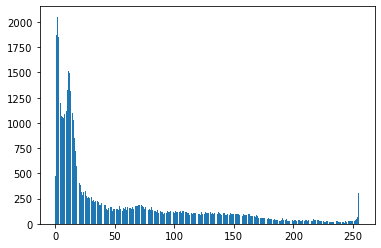

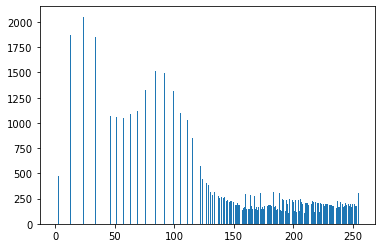

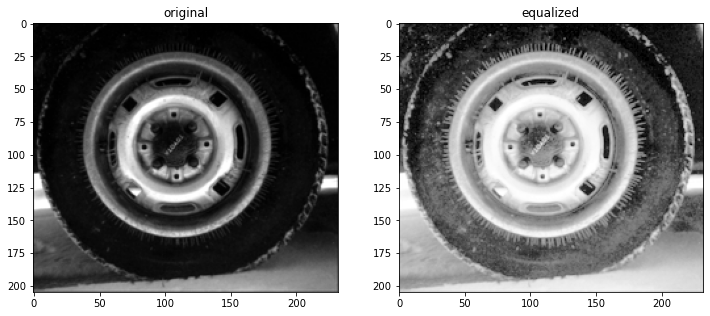

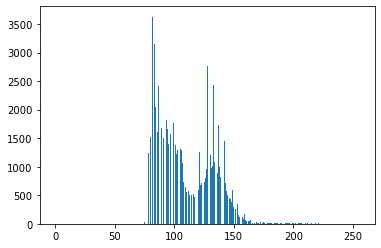

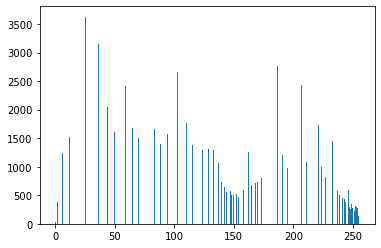

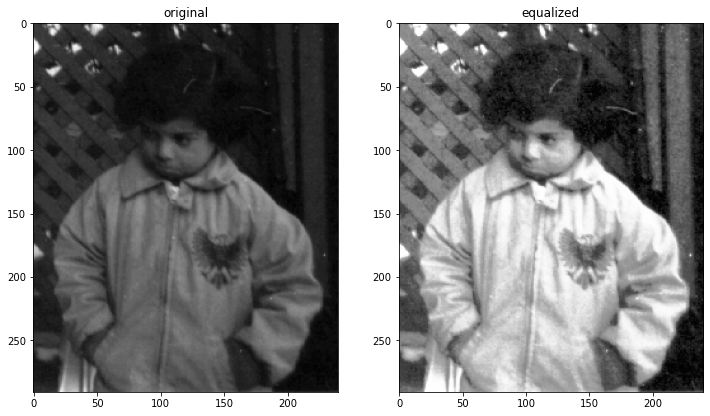

In [406]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass


def getHistOfImage(image,nbins =256):
    hist = np.zeros(nbins)
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]):
            hist[image[i,j]] += 1
    return hist

def applyHistEqua(hist_img,image):
    img = np.array(image)
    #image size
    img_size = (img.shape[0] * img.shape[1])
    # cummulative sum of probs
    H_c= []
    _sum = 0
    for p in hist_img: 
        _sum += p
        H_c.append(round(_sum))
    # map the cummulative sum     
    T = []
    for i in range (256): 
        T.append(round( 255 * H_c[i]/img_size))
        
    # change image gray levels
    for i in range(img.shape[0]): 
        for j in range(img.shape[1]): 
            img[i,j] = T[img[i,j]]
    return img
        
    
    
def dowork(path):

    org = io.imread(path)

    hist = getHistOfImage(org)

    plt.figure()
    plt.bar(np.arange(0,256,1), hist)

    new_img = applyHistEqua(hist, org)

    new_hist = getHistOfImage(new_img)

    plt.figure()
    plt.bar(np.arange(0,256,1), new_hist)

    show_images([org,new_img], ['original', 'equalized'])

dowork('imgs/tire.tif')
dowork('imgs/pout.tif')


